In [1]:
from pyiron_workflow import Workflow
from nodes.paraprobe import *
from nodes.compositionspace import *
from nodes.visualize import *

In [2]:
config_file_path = 'experiment_params.yaml'
results_file_path = 'CompositionSpace.Results.0.nxs'

In [3]:
wf = Workflow("demo")
wf.transcoder = transcoder_job()
wf.ranger = ranger_job(wf.transcoder)
wf.ranger_reporter = ranger_reporter(wf.ranger)


wf.voxel = compositionspace_voxelize(config_file_path=config_file_path,
                           results_file_path=results_file_path,
                           recon_file_path=wf.transcoder,
                           range_file_path=wf.ranger)
wf.autophase = compositionspace_autophase(config_file_path=config_file_path, 
                                    results_file_path=wf.voxel)
wf.segmentation = compositionspace_segmentation(config_file_path=config_file_path, 
                                          results_file_path=wf.autophase)
wf.cluster = compositionspace_clustering(config_file_path=config_file_path, 
                                   results_file_path=wf.segmentation)
wf.xdmf = generate_xdmf(wf.cluster)
wf.results = visualize_hdf(wf.cluster)

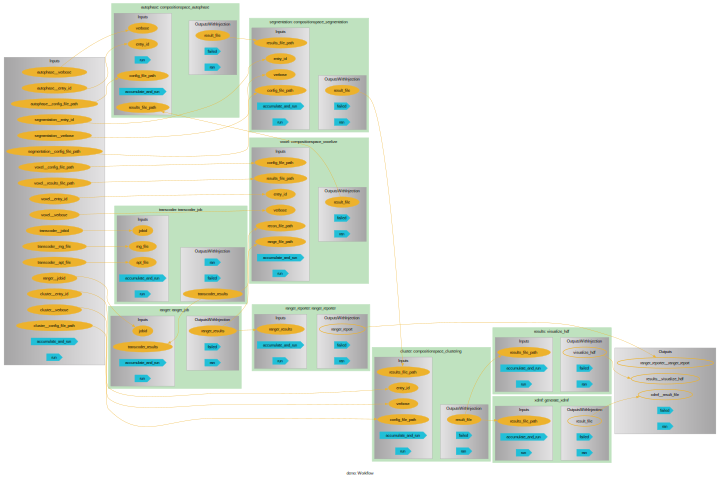

In [4]:
wf.draw(size=(10,20))

In [5]:
wf.run()

Computing SHA256 hash for file named Si.apt
Computing SHA256 hash for file named Si.RNG
Inspecting whether NeXus/HDF5 is used...
The reconstruction and ranging come from files of technology
partners but the paraprobe-toolbox uses NeXus/HDF5.
Hence, paraprobe-transcoder will transcode to NeXus/HDF5.
Writing configuration file ...
PARAPROBE.Transcoder.Config.SimID.1.nxs was written successfully
/entry1/transcode/reconstruction/path, /entry1/transcode/ranging/path
True
Processing configuration file: PARAPROBE.Transcoder.Config.SimID.1.nxs
Processing reconstruction: Si.apt
Processing ranging: Si.RNG
Results file: PARAPROBE.Transcoder.Results.SimID.1.nxs
Input reconstruction and ranging definitions use files from
technology partners (POS, ePOS, APT, RRNG, RNG) or other
file formats from the community. These will be transcoded to NeXus...
Computing SHA256 hash for file named PARAPROBE.Transcoder.Config.SimID.1.nxs
Reading Si.apt which is 37810040 B
File describes 945211 ions
Currently at byt


libgomp: Invalid value for environment variable OMP_NUM_THREADS: 


paraprobe-ranger
A tool of the paraprobe-toolbox supporting FAIR materials science research
Supporting the community with strong-scaling and open tools for robust and automated uncertainty quantification...

The compiled code of this tool uses the source code with the following GitSha:
v0.4
"v0.5.1"
Preprocessor run
Aug 26 2024
23:47:39
Paraprobe can be cited via the following papers...
Article
M. K"uhbach and P. Bajaj and A. Breen and E. A. J"agle and B. Gault
On Strong Scaling Open Source Tools for Mining Atom Probe Tomography Data
Microscopy and Microanalysis, 2019, Volume 25, Supplement S2, pp298-299
https://doi.org/10.1017/S1431927619002228


Article
M. K"uhbach and P. Bajaj and H. Zhao and M. H. C"{c}elik E. A. J"agle and B. Gault
On strong-scaling and open-source tools for analyzing atom probe tomography data
npj Computational Materials, 2021, Volume 7, ppArticle number 21
https://doi.org/10.1038/s41524-020-00486-1


Article
M. K"uhbach and A. J. London  and J. Wang and D. K. Sc

{'ranger_reporter__ranger_report': None,
 'xdmf__result_file': 'CompositionSpace.Results.0.nxs.xdmf',
 'results__visualize_hdf': <jupyterlab_h5web.widget.H5Web object>}

In [6]:
wf.outputs.results__visualize_hdf.value

<jupyterlab_h5web.widget.H5Web object>